# Geneal Process 

- define model sub-classed from `nn.Model`
    - define layers in `__init__()`
    - define structure in `forward()`

- define loss function and optimizer

- load train/test data

- train and evaluate model with batched data

In [17]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [7]:
# 1 create model
class ANN(nn.Module):
     
    def __init__(self, input_dim, output_dim):
        super().__init__()

        self.input_dim = input_dim
         
        # hidden layer 1
        self.hidden_1 = nn.Linear(input_dim, 256)
        # Non-linearity 1
        self.relu_1 = nn.ReLU()
         
        # hidden layer 2
        self.hidden_2 = nn.Linear(256, 128)
        # Non-linearity 2
        self.relu_2 = nn.ReLU()
         
        # predict layer
        self.predict = nn.Linear(128, output_dim) 
     
    def forward(self, x):
        # hidden layer 1
        out = self.hidden_1(x.view(-1, self.input_dim))
        out = self.relu_1(out)
         
        # hidden layer 2
        out = self.hidden_2(out)
        out = self.relu_2(out)
         
        #  output
        return self.predict(out)

net = ANN(28*28, 10)
print(net)

ANN(
  (hidden_1): Linear(in_features=784, out_features=256, bias=True)
  (relu_1): ReLU()
  (hidden_2): Linear(in_features=256, out_features=128, bias=True)
  (relu_2): ReLU()
  (predict): Linear(in_features=128, out_features=10, bias=True)
)


In [30]:
# 2 load data
import torchvision
import torch.utils.data as Data

train_data = torchvision.datasets.MNIST(
    root='./dataset/', 
    train=True,
    transform=torchvision.transforms.ToTensor())

test_data = torchvision.datasets.MNIST(
    root='./dataset/', 
    train=False)

train_data.data[0]

# batch train data
train_loader = Data.DataLoader(dataset=train_data, batch_size=32, shuffle=True)

# preprocess test data
# size: (n, 28, 28) -> (n, 1, 28, 28)
# value [0, 255] -> [0, 1]
with torch.no_grad():
    test_x = Variable(torch.unsqueeze(test_data.data, dim=1)).type(torch.FloatTensor) / 255.0
test_y = test_data.targets

In [34]:
# 3 train model
fun_loss = nn.CrossEntropyLoss() # cross entropy loss
optimizer = torch.optim.SGD(net.parameters(), lr=0.02) # SGD Optimizer

# training and testing
for epoch in range(3):
    for step, (x, y) in enumerate(train_loader): 
        b_x = Variable(x)   # batch x
        b_y = Variable(y)   # batch y

        output = net(b_x)               # ann output
        loss = fun_loss(output, b_y)    # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step%50 == 0:
            test_output = net(test_x) # (10000, 10)
            pred_y = torch.max(test_output, 1)[1].detach() # max() return (value, index)
            accuracy = sum(pred_y==test_y) / test_y.size(0)
            print(f'epoch: {epoch} | loss: {loss.detach().item()} | accuracy: {accuracy}')

epoch: 0 | loss: 0.019578492268919945 | accuracy: 0.9771999716758728
epoch: 0 | loss: 0.009019947610795498 | accuracy: 0.9776999950408936
epoch: 0 | loss: 0.022323980927467346 | accuracy: 0.9776999950408936
epoch: 0 | loss: 0.008780855685472488 | accuracy: 0.9779999852180481
epoch: 0 | loss: 0.02236214093863964 | accuracy: 0.9779000282287598
epoch: 0 | loss: 0.00887977983802557 | accuracy: 0.978600025177002
epoch: 0 | loss: 0.027022983878850937 | accuracy: 0.9778000116348267
epoch: 0 | loss: 0.17525213956832886 | accuracy: 0.9763000011444092
epoch: 0 | loss: 0.12394986301660538 | accuracy: 0.9783999919891357
epoch: 0 | loss: 0.003715910017490387 | accuracy: 0.9782000184059143
epoch: 0 | loss: 0.04267463833093643 | accuracy: 0.9768000245094299
epoch: 0 | loss: 0.012184333987534046 | accuracy: 0.9765999913215637
epoch: 0 | loss: 0.013833334669470787 | accuracy: 0.9786999821662903
epoch: 0 | loss: 0.010202828794717789 | accuracy: 0.9778000116348267
epoch: 0 | loss: 0.059025269001722336 | 

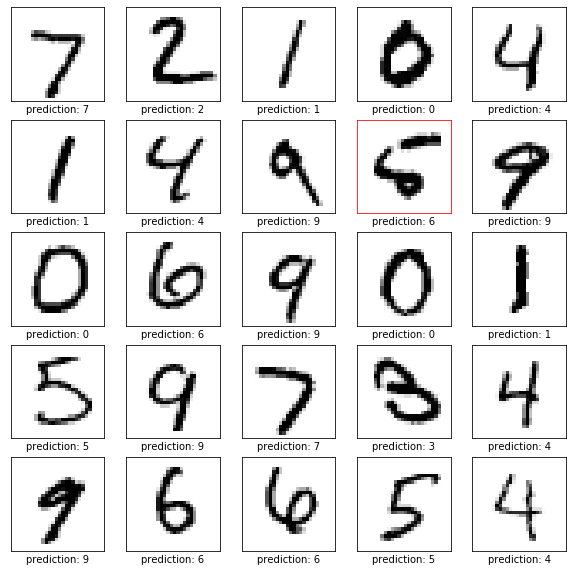

In [37]:
# 4 evaluate model 
import matplotlib.pyplot as plt
%matplotlib inline

# evaluation
def evaluate(x, y):
    '''
    x: (n, 1, 28, 28)
    y: (n, 10)
    '''
    out = net(x)
    y_ = torch.max(out, 1)[1].detach() # max() return (value, index)
    accuracy = sum(y_==y) / y.size(0)
    return accuracy.item(), y_

num = 5
acc, predicted_y = evaluate(test_x[:num**2], test_y[:num**2])

# plots
plt.figure(figsize=(10,10))
for i in range(num**2):
    plt.subplot(num, num,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_x[i][0].numpy(), cmap=plt.cm.binary)
    plt.xlabel(f'prediction: {predicted_y[i]}')
    
    # mark error prediction with red border
    if test_y[i] != predicted_y[i]:
        ax = plt.gca()
        for name, border in ax.spines.items():
            border.set_color('red')
plt.show()